In [ ]:
S = 1e5
a = 62.5
b = 0.25
c = a
d = b

sample_p = 0.5

n = matrix(c(706, 664, 661, 1111), 4)
x = c(346, 312, 284, 556)
p = matrix(c(346/706, 312/664, 284/661, 556/1111), nrow = S, ncol = 4, byrow = T)

alpha = rep(1, S)
beta = rep(1, S)

alpha.lfc = function(alpha, beta, p) {
  # cat('alpha is ',  alpha, '\n')
  # cat('beta is ',  beta, '\n')
  # cat('beta is ',  beta, '\n')
  # middle = (gamma(alpha + beta)/gamma(alpha))^4 * exp(sum(alpha * log(p))) * exp(-alpha*b) * alpha^(a-1)
  # cat('middle is ',  middle, '\n')
  # log(middle)
  post=4*(lgamma(alpha+beta)-lgamma(alpha)-lgamma(beta)) + alpha*sum(log(p))
  post=post + (a-1)*log(alpha)-(alpha*b)
  return(post)
}

beta.lfc = function(alpha, beta, p) {
  post=4*(lgamma(alpha+beta)-lgamma(alpha)-lgamma(beta)) + alpha*sum(log(p))
  post=post + (a-1)*log(alpha)-(alpha*b)
  return(post)
}


for (iter in 2:S) {

  # draw alpha
  alpha.star = rnorm(1, alpha[iter - 1], 0.1)
  if (alpha.star < 0) {
    aprob = 0
  } else {
    num = alpha.lfc(alpha.star, beta[iter - 1], p)
    denom = alpha.lfc(alpha[iter - 1], beta[iter - 1], p)
    aprob = exp(num - denom)
  }
  alpha[iter] = ifelse(aprob > runif(1, 0, 1), alpha.star, alpha[iter - 1])

  # draw beta
  beta.star = rnorm(1, beta[iter - 1], 0.1)
  if (beta.star < 0) {
    aprob = 0
  } else {
    num = beta.lfc(alpha[iter - 1], beta.star, p)
    denom = beta.lfc(alpha[iter - 1], beta[iter - 1], p)
    aprob = exp(num - denom)
  }
  beta[iter] = ifelse(aprob > runif(1, 0, 1), beta.star, beta[iter - 1])

  p[iter, ] = rbeta(1, x + alpha[iter], n - x + beta[iter])

  # cat('p[iter] is ',  p[iter], '\n')
  # cat('beta[iter] is ',  beta[iter], '\n')
}

In [ ]:
mean(p[0.1*S:S])
mean(alpha[0.1*S:S])
mean(beta[0.1*S:S])

[1] 0.4739392

[1] 0.000236992

[1] 3.550933

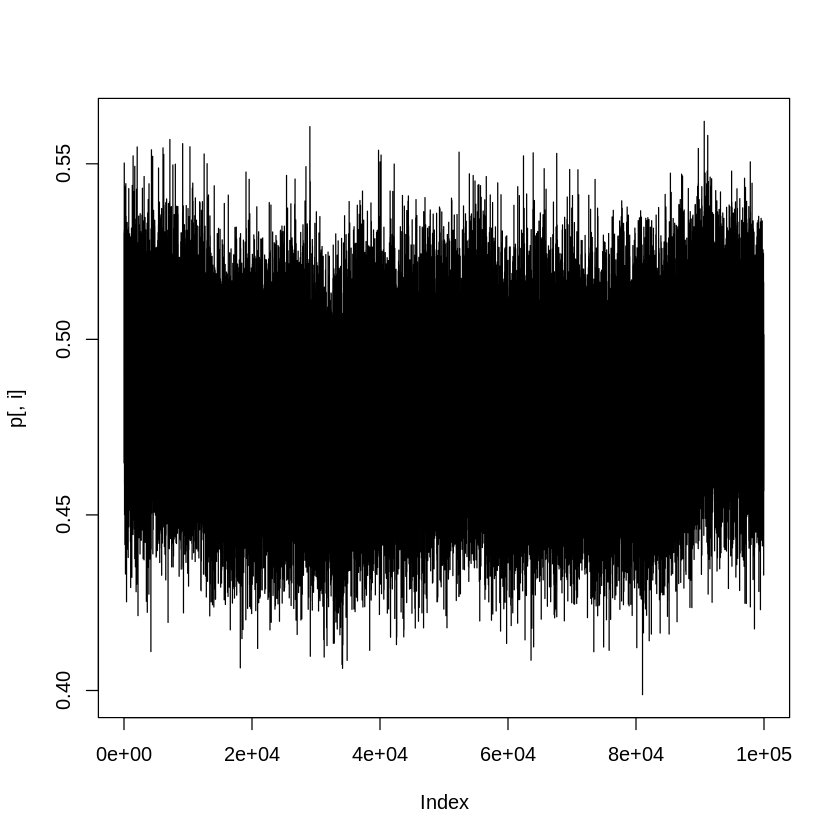

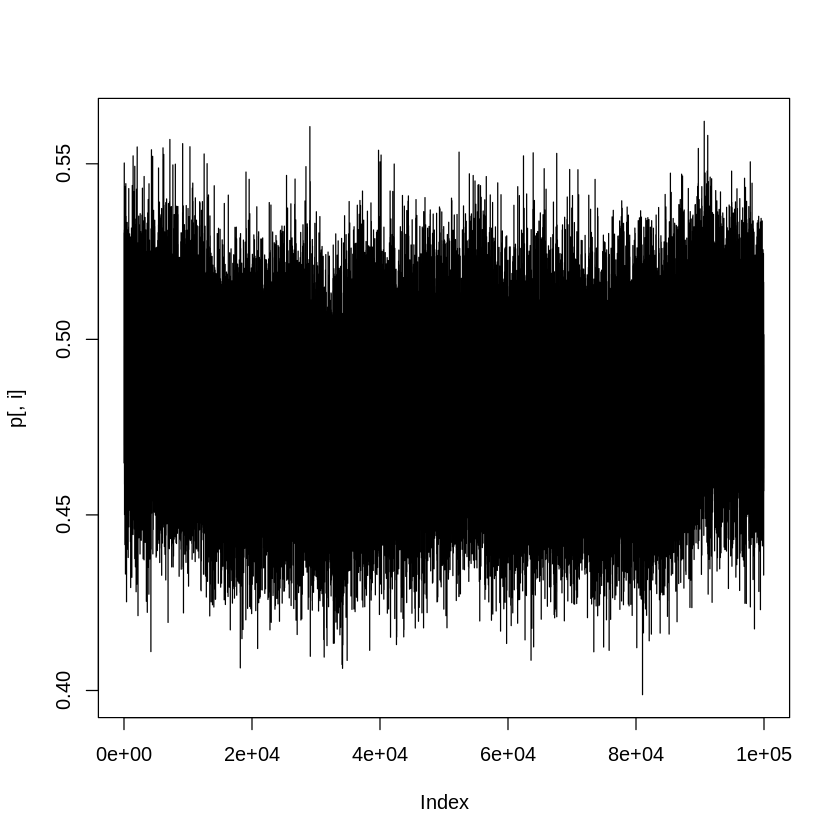

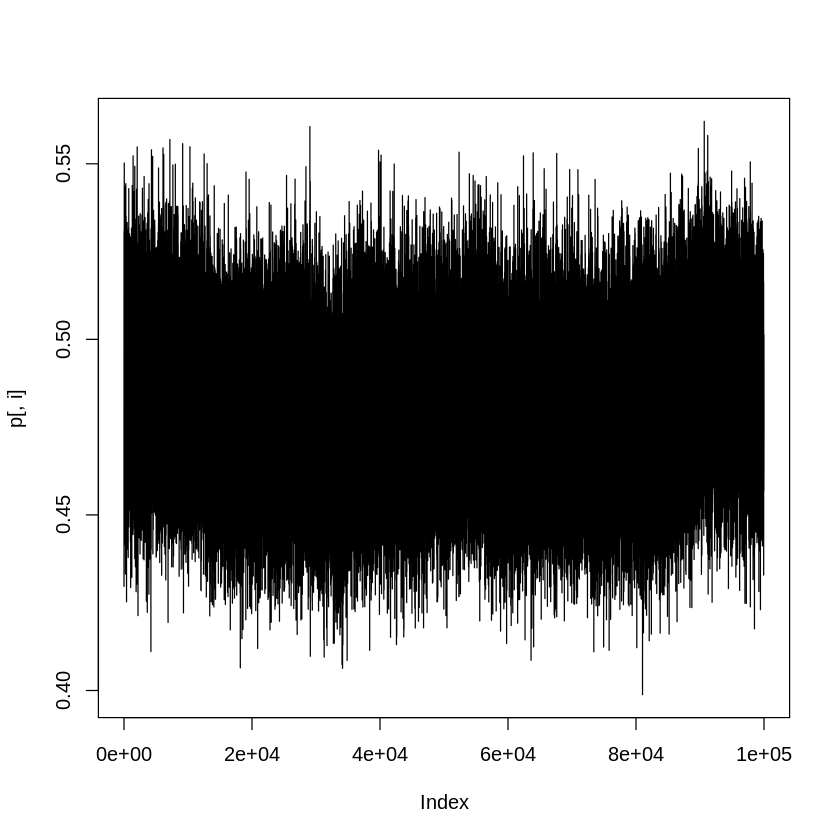

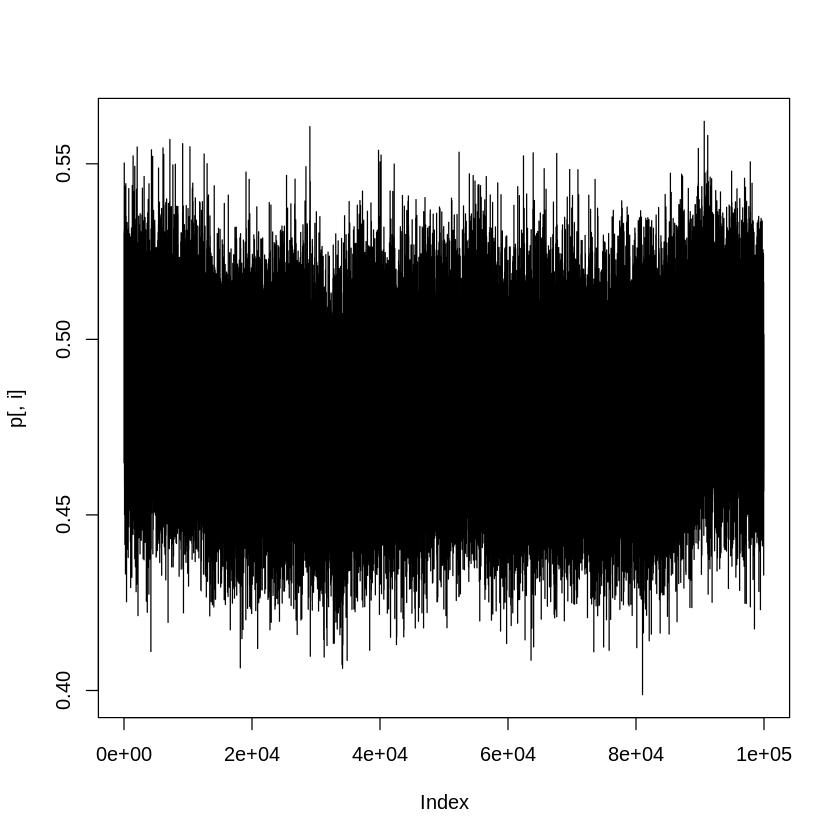

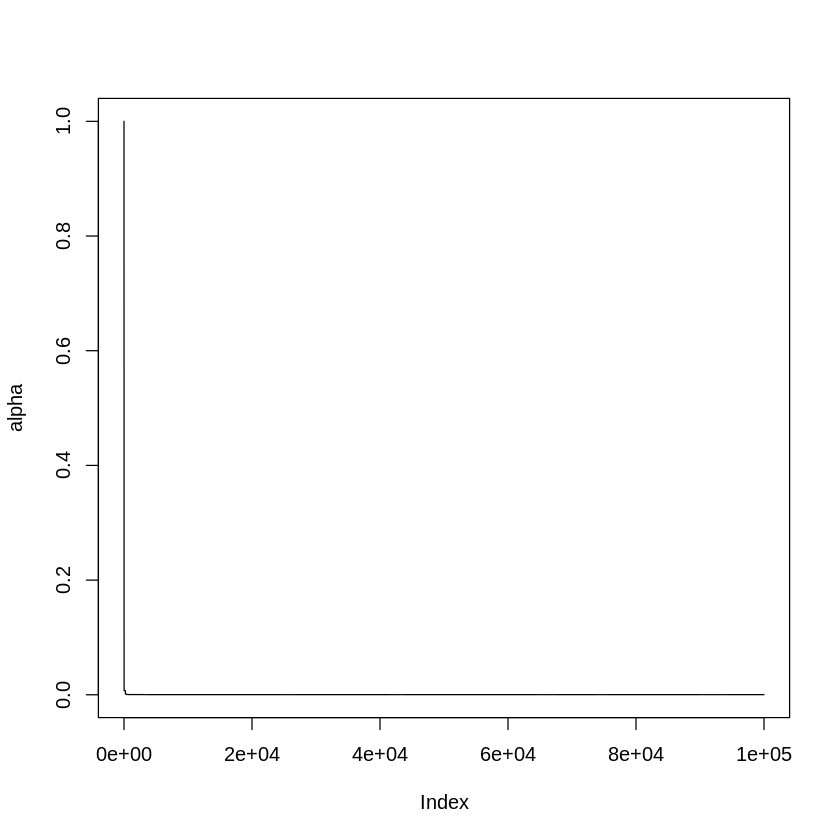

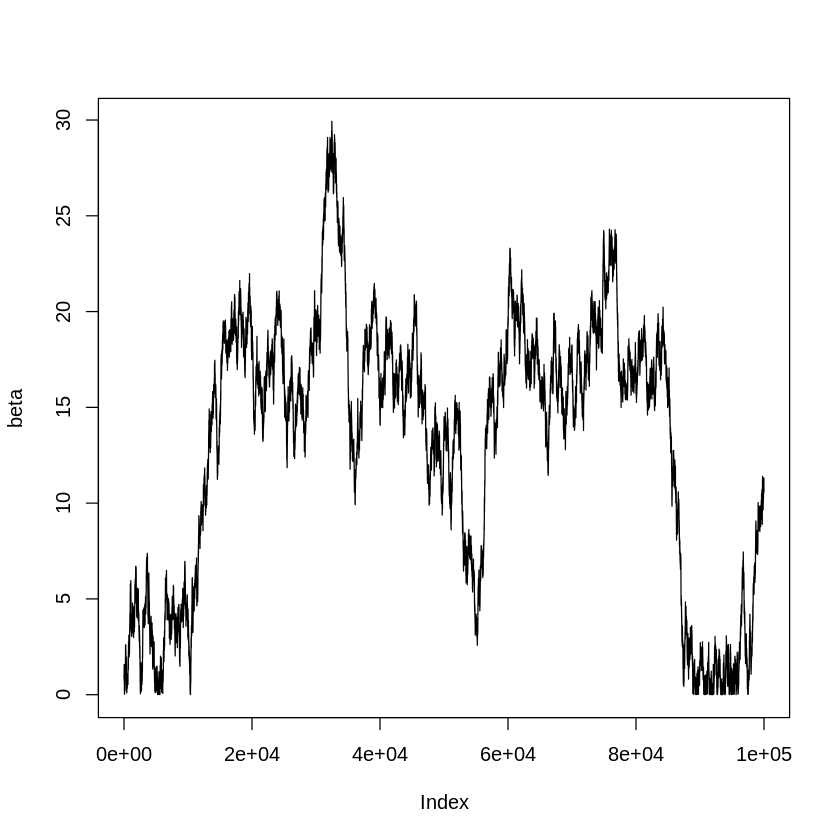

In [ ]:
for (i in 1:4) {
  plot(p[,i], type = 'l')
}

plot(alpha, type = 'l')
plot(beta, type = 'l')

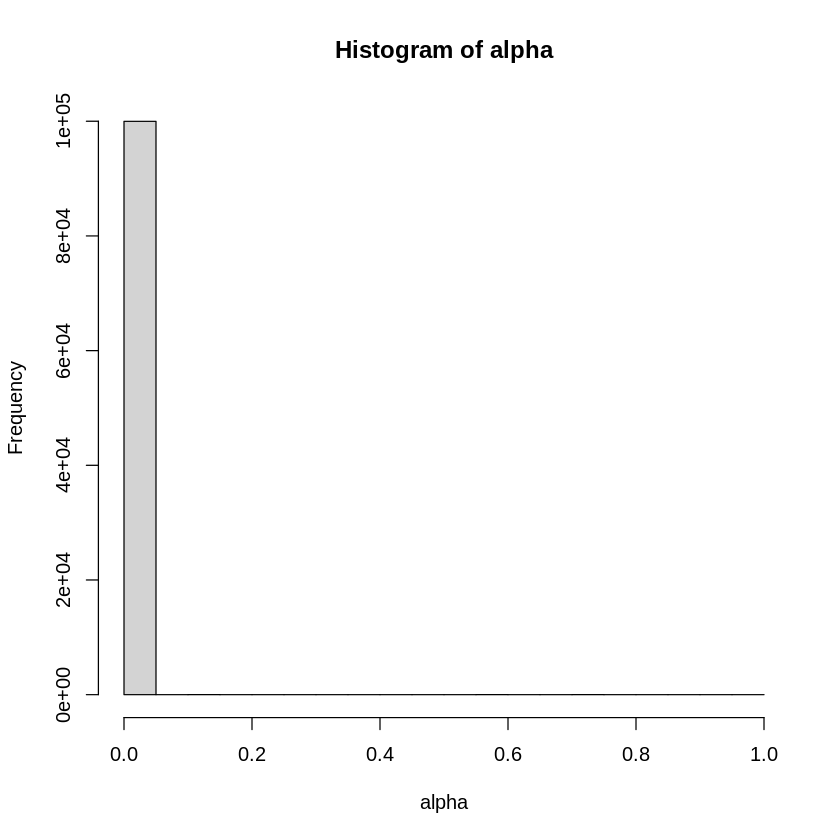

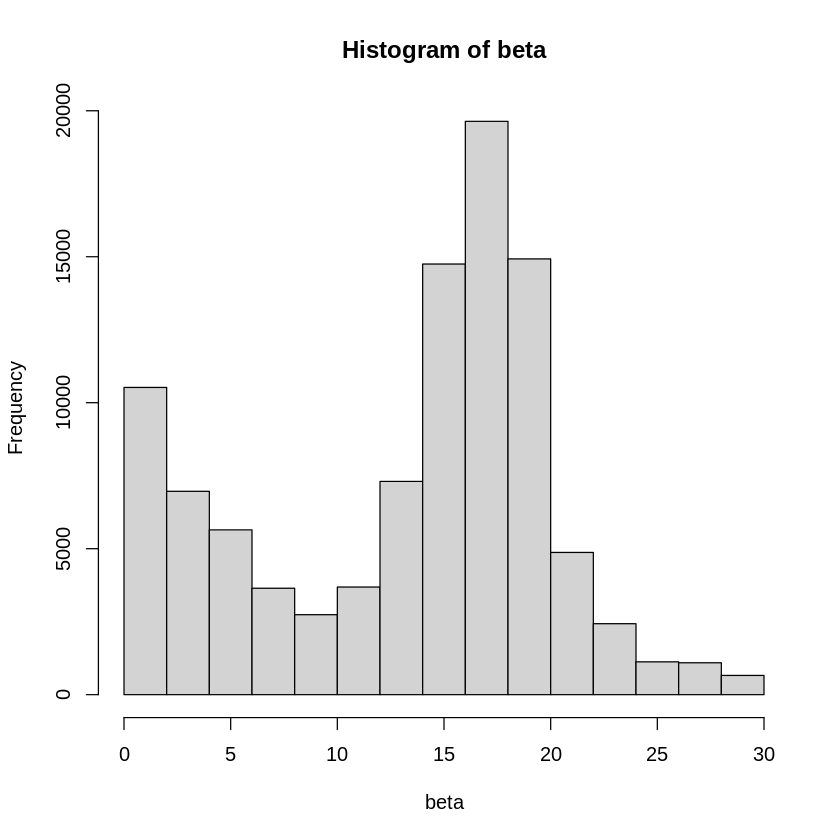

In [ ]:
hist(alpha)
hist(beta)

# redo

In [ ]:
p = q = c()

S = 1e3

x = c(346, 312, 284, 556)
n = c(706, 664, 661, 1111)

theta = matrix(0, nrow = S, ncol= 4, byrow = T)


theta[1,] = rep(0.3, 4)
p = q = rep(1, S)


q_lfc = function(q, p, theta) {
  # cat ('in q_lfc\n')
  # cat('4*(lgamma(p+q) - lgamma(p) - lgamma(q)) is', 4*(lgamma(p+q) - lgamma(p) - lgamma(q)), '\n')
  # cat('(sum(n-x) + 4*q - 4)*log(1-theta) is', (sum(n-x) + 4*q - 4)*log(1-theta), '\n')
  # cat('log(1-theta) is', log(1-theta), '\n')
  # cat('theta is', theta, '\n')
  4*(lgamma(p+q) - lgamma(p) - lgamma(q)) + (sum(n-x) + 4*q - 4)*log(1-theta)
}

p_lfc = function(p, q, theta) {
  # cat ('in p_lfc\n')
  # cat('4*(lgamma(p+q) - lgamma(p) - lgamma(q)) is', 4*(lgamma(p+q) - lgamma(p) - lgamma(q)), '\n')
  # cat('log(theta) is', log(theta), '\n')
  # cat('theta is', theta, '\n')
  # cat('4*(lgamma(p+q) - lgamma(p) - lgamma(q)) + (sum(x) + 4*(p-1)) * log(theta)', 4*(lgamma(p+q) - lgamma(p) - lgamma(q)) + (sum(x) + 4*(p-1)) * log(theta), '\n')
  4*(lgamma(p+q) - lgamma(p) - lgamma(q)) + (sum(x) + 4*(p-1)) * log(theta)
}

for (iter in 2:S) {

  # cat('\n\niter is ', iter, '\n')

  p_star = rnorm(1, p[iter - 1], 0.1)
  # cat('p_star is ', p_star, '\n')
  if (p_star < 0) {
    aprob = 0
  } else {
    # cat('q[iter - 1] is', q[iter - 1], '\n')
    num = p_lfc(p_star, q[iter - 1], theta[iter - 1,])
    denom = p_lfc(p[iter - 1], q[iter - 1], theta[iter - 1,])
    aprob = exp(num - denom)
    # cat ('num is ', num, '\n')
  }
  p[iter] = ifelse(aprob > runif(1, 0, 1), p_star, p[iter - 1])

  q_star = rnorm(1, q[iter - 1], 0.1)
  if (q_star < 0) {
    aprob = 0
  } else {
    num = q_lfc(q_star, p[iter - 1], theta[iter - 1,])
    denom = q_lfc(q[iter - 1], p[iter - 1], theta[iter-1,])
    aprob = exp(num - denom)
    # cat ('num is ', num, '\n')
    # cat ('aprob is ', aprob, '\n')
  }
  # cat('q_star is',q_star,'\n')
  # cat('q[iter - 1]',q[iter - 1],'\n')
  q[iter] = ifelse(aprob > runif(1, 0, 1), q_star, q[iter - 1])
  # cat ('q[iter] is ', q[iter], '\n')

  theta[iter,] = rbeta(1, sum(x) + 4*p[iter] - 3, sum(n - x) + 4*q[iter] - 3)

  # cat('sum(x) + 4*p[iter] - 3 is', sum(x) + 4*p[iter] - 3, '\n')
  # cat('sum(n - x) + 4*q[iter] - 3 is ', sum(n - x) + 4*q[iter] - 3, '\n')
  # cat('theta[iter] is ', theta[iter], '\n')

}

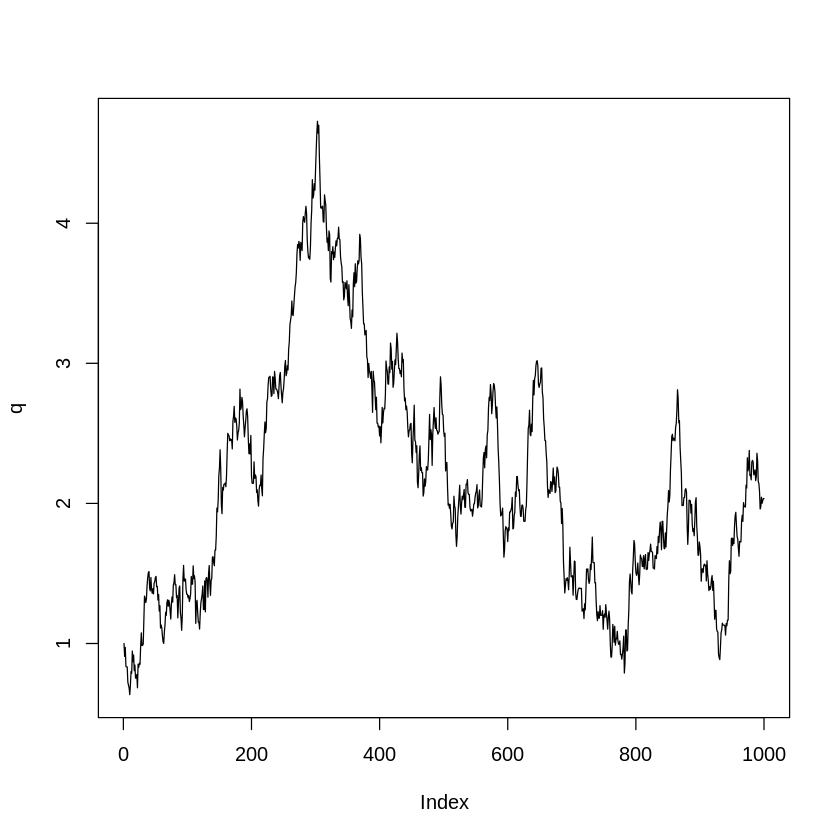

In [ ]:
plot(q, type = 'l')

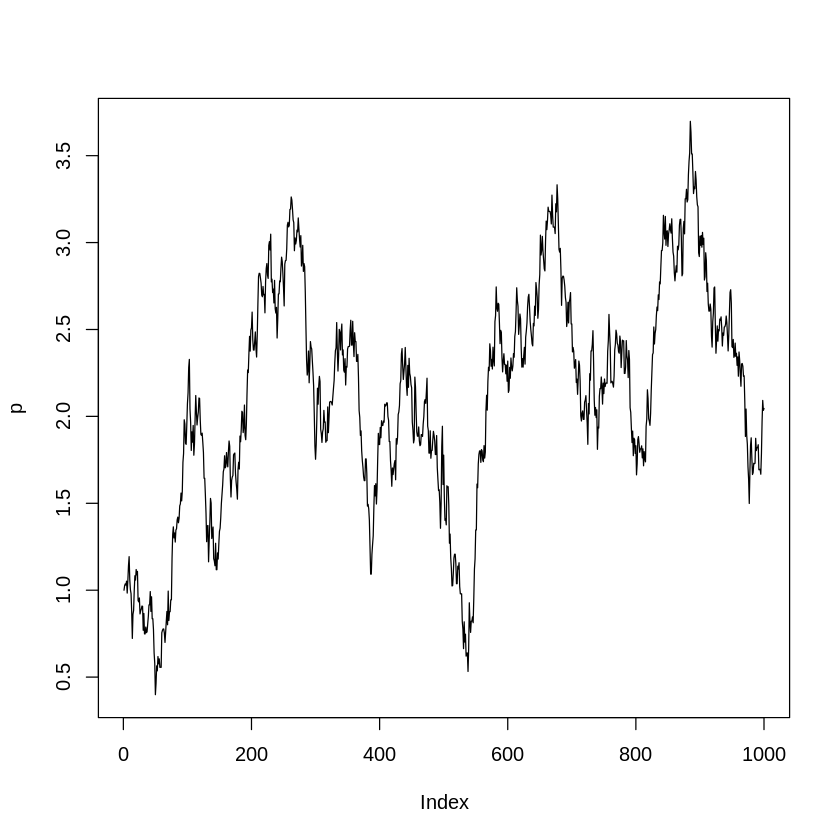

In [ ]:
plot(p, type = 'l')

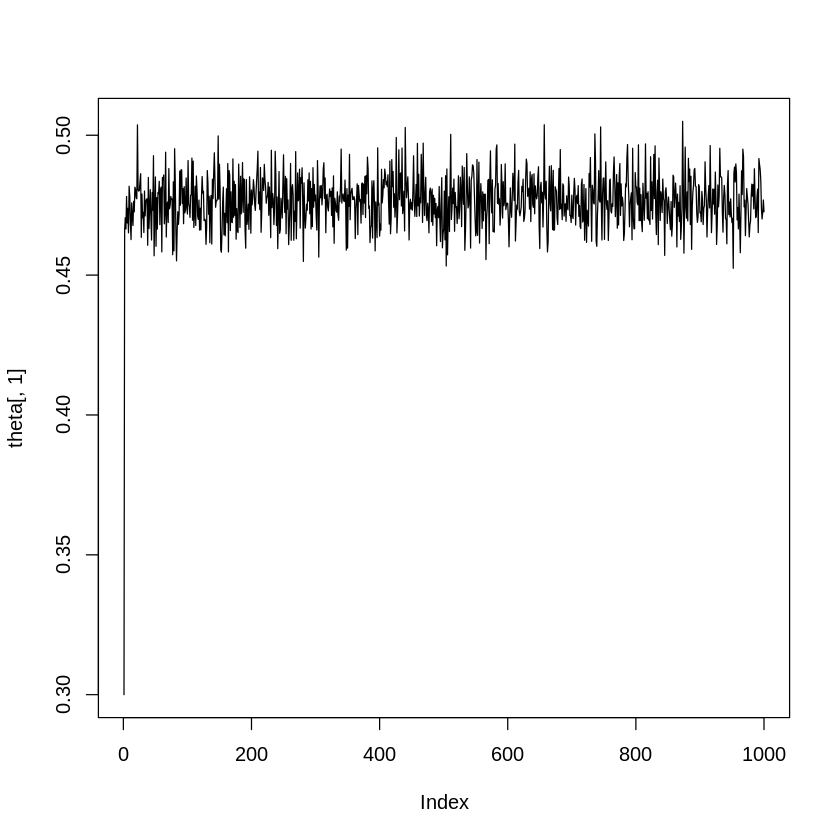

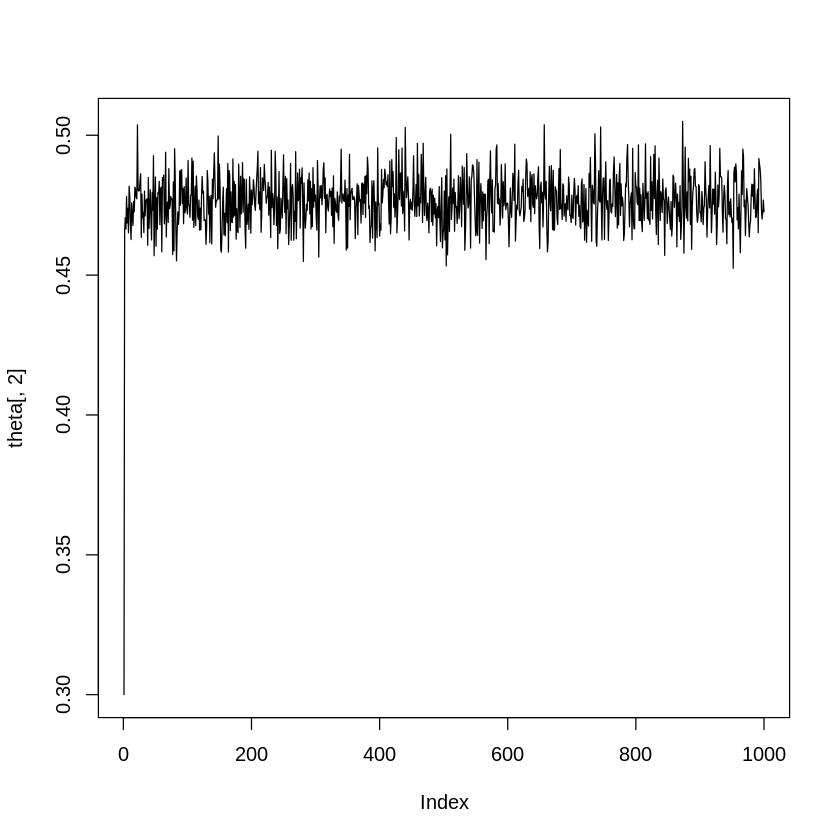

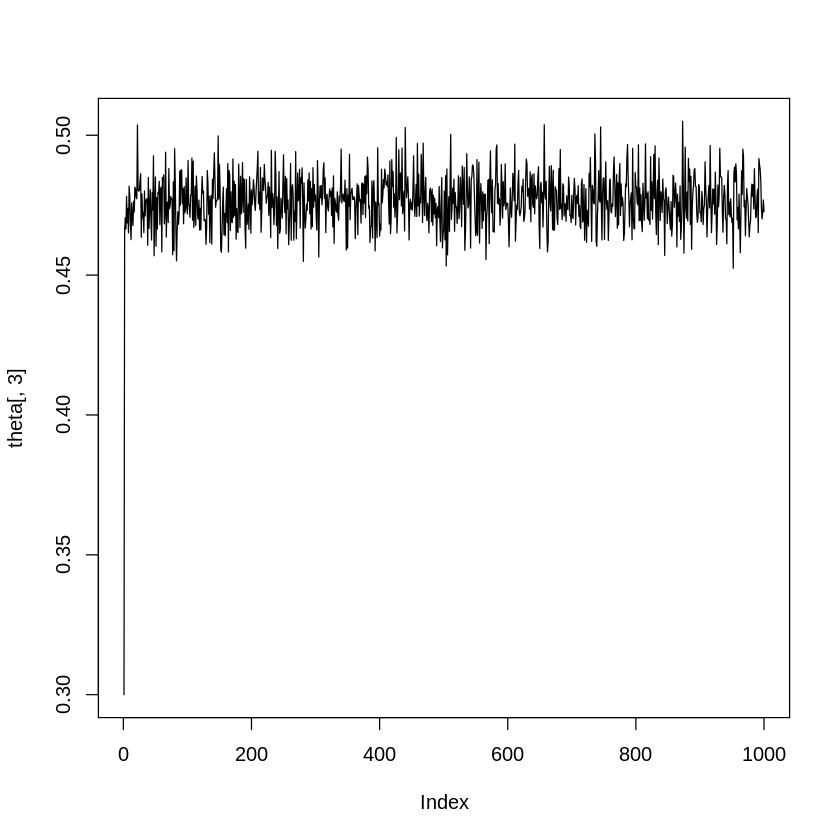

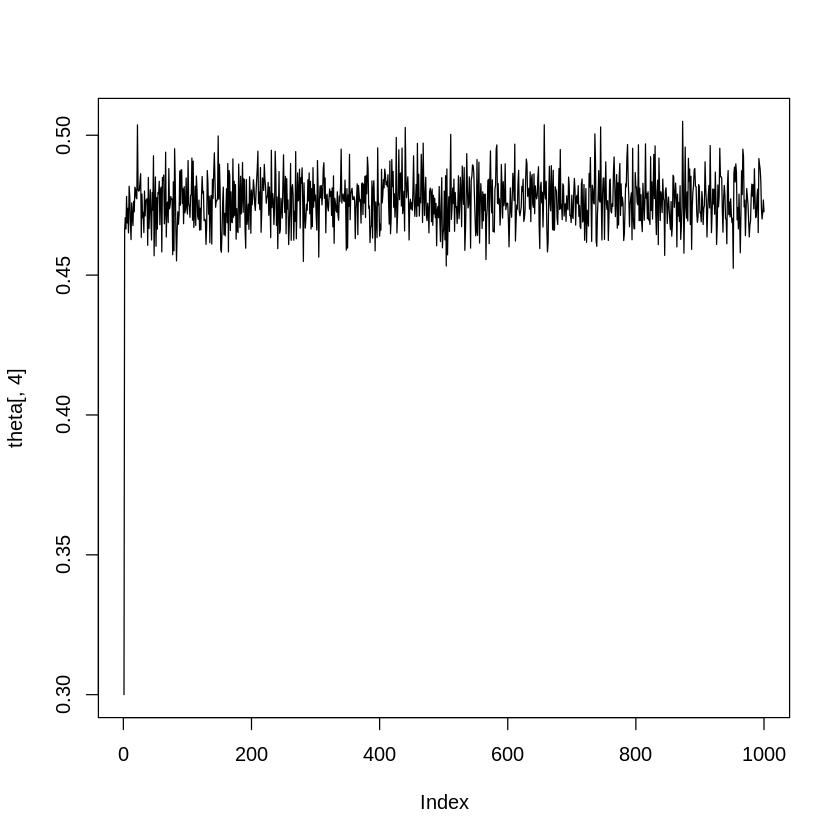

In [ ]:
plot(theta[,1], type = 'l')
plot(theta[,2], type = 'l')
plot(theta[,3], type = 'l')
plot(theta[,4], type = 'l')

In [ ]:
mean(theta[0.1*S:S])
mean(p[0.1*S:S])
mean(q[0.1*S:S])

[1] 0.4718398

[1] 2.072592

[1] 1.35113

In [ ]:
S = 1e4

x = c(346, 312, 284, 556)
n = c(706, 664, 661, 1111)

theta = matrix(c(346/706, 312/664, 284/661, 556/1111), nrow = S, ncol = 4)

p = q = rep(1, S)

a = c = 25/4
b = d = 1/40

p_lfc = function(theta, p, q) {
  prod = 1
  for (i in 1:4) {
    prod = prod*theta[i]^(p-1)
  }
  res = (gamma(p+q)/(gamma(p)*gamma(q)))^4*prod*exp(-b*p)*p^(a-1)
  log(res)
}

q_lfc = function(theta, p, q) {
  prod = 1
  for (i in 1:4) {
    prod = prod*(1-theta[i])^(q-1)
  }
  res = (gamma(p+q)/(gamma(p)*gamma(q)))^4* prod * exp(-b*p)*p^(a-1)
  log(res)
}


for (iter in 2:S) {

  theta[iter, ] = rbeta(4, p[iter - 1] + x, q[iter - 1] + n-x)

  p_star = rnorm(1, p[iter - 1], 0.1)
  if (p_star < 0) {
    aprob = 0
  } else {
    num = p_lfc(theta[iter, ], p_star, q[iter - 1])
    denom = p_lfc(theta[iter,], p[iter - 1], q[iter - 1])
    aprob = exp(num - denom)
  }
  p[iter] = ifelse(aprob > runif(1, 0, 1), p_star, p[iter - 1])


  q_star = rnorm(1, q[iter -1], 0.1)
  if(q_star < 0) {
    aprob = 0
  } else {
    num = q_lfc(theta[iter,], p[iter - 1], q_star)
    denom = q_lfc(theta[iter,], p[iter - 1], q[iter - 1])
    aprob = exp(num - denom)
  }
  q[iter] = ifelse(aprob > runif(1, 0, 1), q_star, q[iter - 1])

}

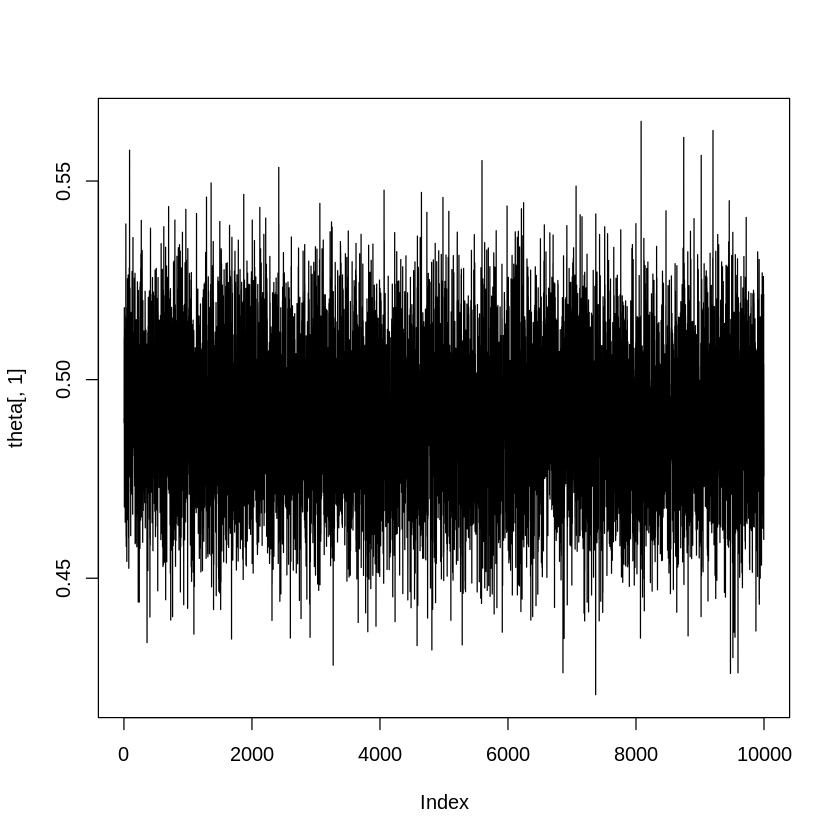

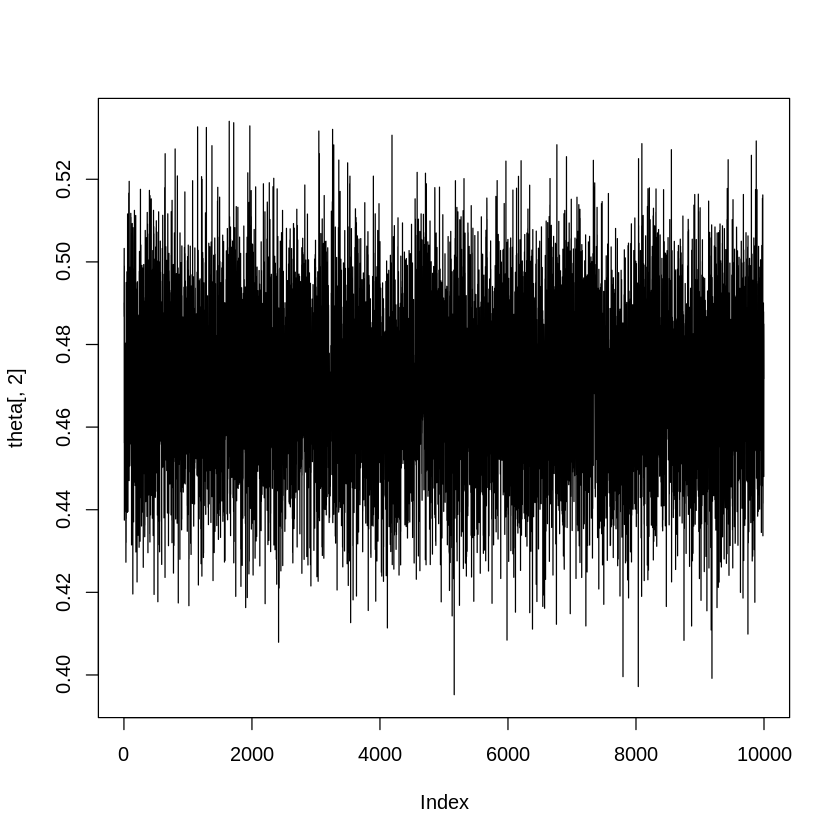

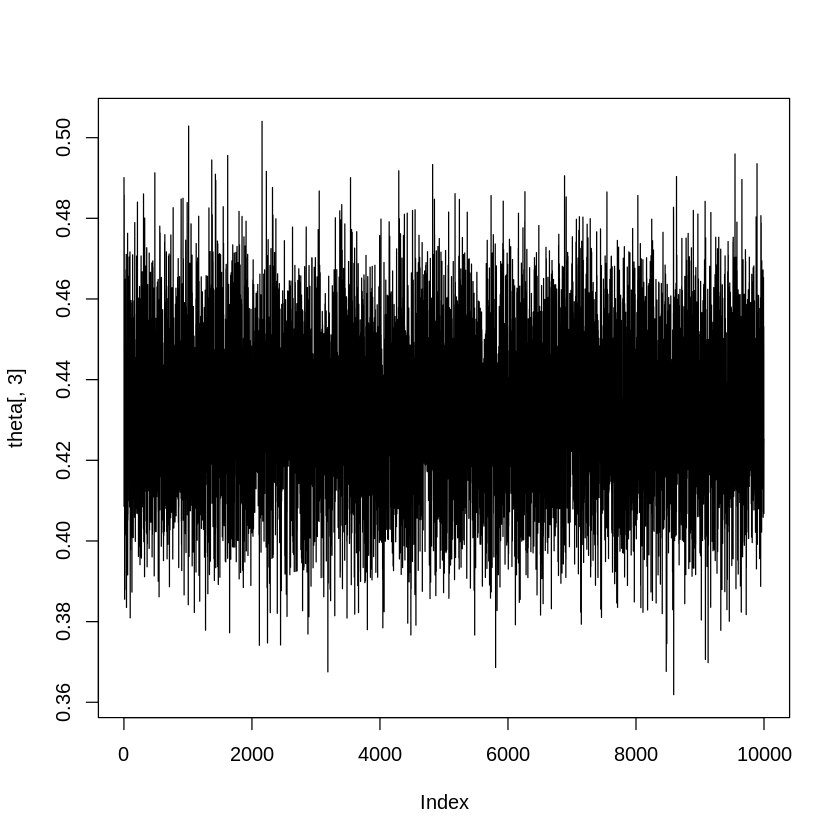

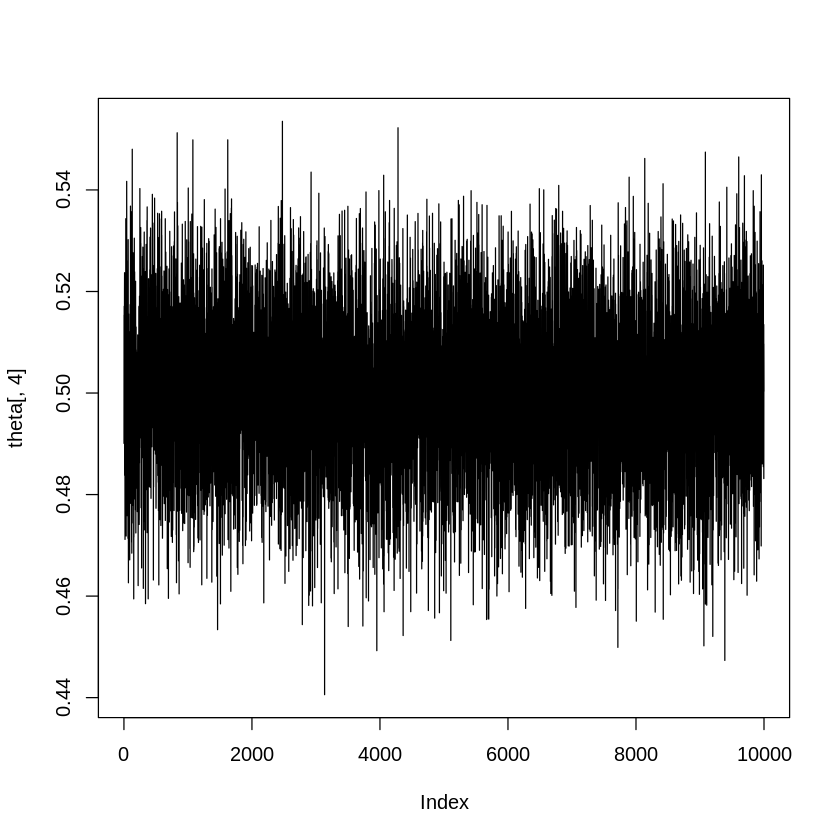

In [ ]:
plot(theta[,1], type = 'l')
plot(theta[,2], type = 'l')
plot(theta[,3], type = 'l')
plot(theta[,4], type = 'l')

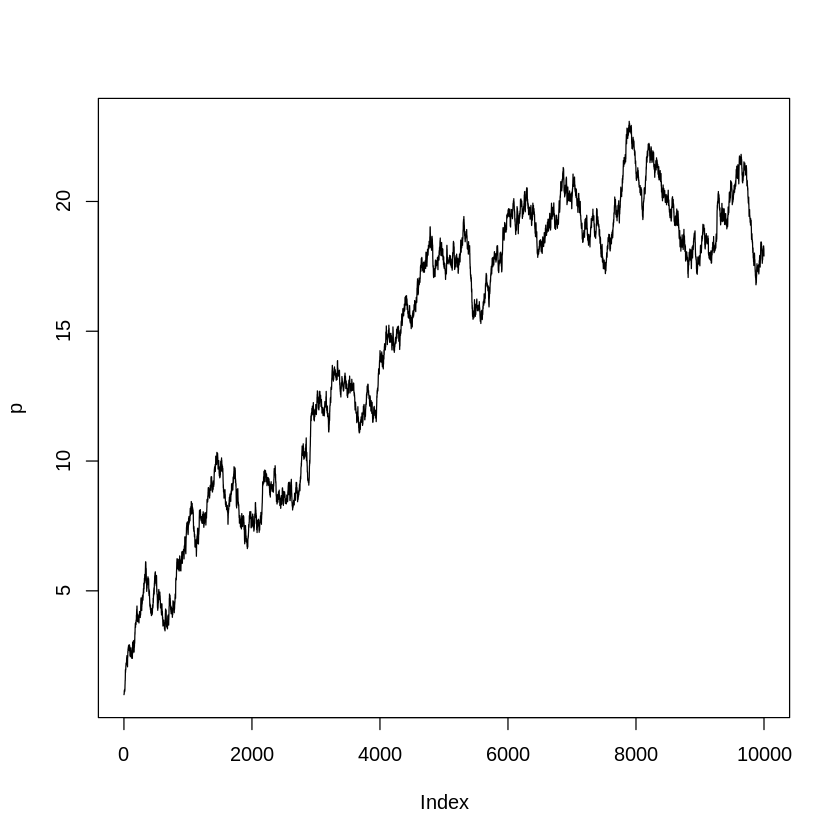

In [ ]:
plot(p, type = 'l')

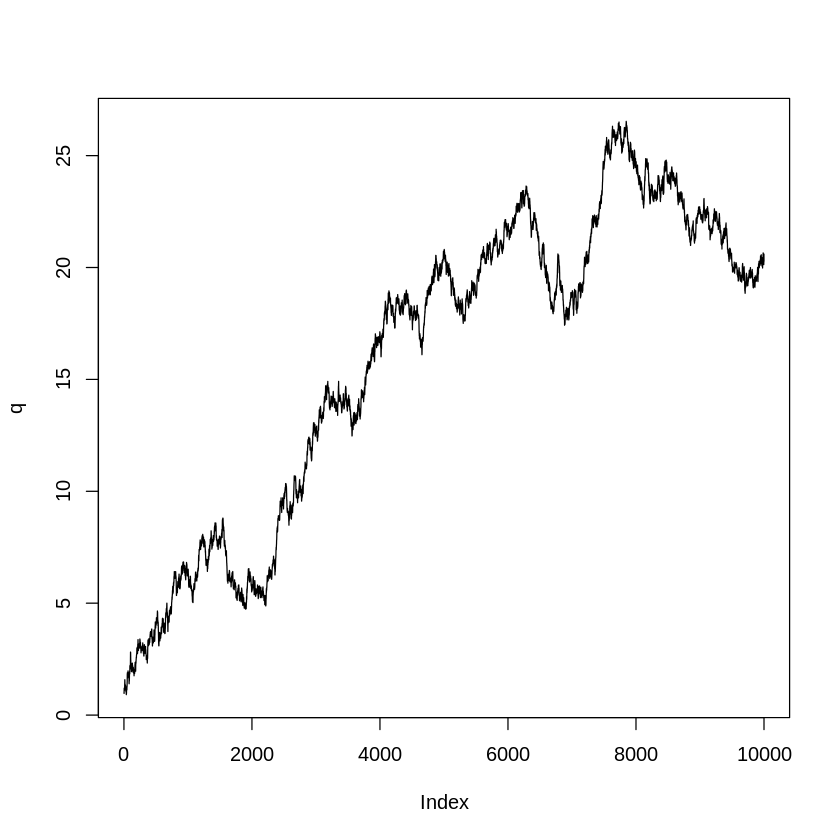

In [ ]:
plot(q, type = 'l')

In [ ]:
mean(theta)
mean(p)
mean(q)
# p and q do not seem to converge. However theta seems to converge

[1] 0.4729686

[1] 14.63169

[1] 15.94347